# NSL-KDD Veri Setinin Derinlemesine İncelenmesi: Saldırı Tespit Sistemlerine Yönelik Kapsamlı Bir Analiz

## Giriş

Günümüzde siber güvenlik, özellikle ağ tabanlı saldırıların tespit edilmesi (Intrusion Detection Systems - IDS) bağlamında, bilgi teknolojileri alanının en kritik çalışma konularından biri haline gelmiştir. IDS sistemlerinin performansını değerlendirmek ve yeni yöntemler geliştirmek amacıyla çeşitli veri setlerinden yararlanılmaktadır. Bu bağlamda, NSL-KDD veri seti, orijinal KDD Cup 1999 veri setindeki dengesizlikler ve tekrarlayan kayıtlar gibi sorunların giderilmesi amacıyla oluşturulmuş, daha dengeli ve güvenilir bir alternatif olarak öne çıkmıştır. NSL-KDD, ağ trafiği üzerindeki normal ve anormal davranışları temsil eden çeşitli veri örnekleri sunarak, saldırı tespit algoritmalarının geliştirilmesi ve doğrulanması için araştırmacılara kapsamlı bir kaynak sağlamaktadır.

Bu çalışmanın temel amacı, NSL-KDD veri seti üzerinde çeşitli makine öğrenmesi algoritmaları uygulanarak ağ saldırılarının etkin bir şekilde tespit edilmesini sağlamak, uygulanan yöntemlerin başarımları üzerinden kapsamlı bir karşılaştırmalı analiz gerçekleştirmek ve elde edilen bulgular doğrultusunda ağ güvenliği alanına katkı sunacak öneriler geliştirmektir. Çalışma sürecinde, veri ön işleme teknikleri kullanılarak veri setinin analize uygun hale getirilmesi sağlanmış; ardından farklı sınıflandırma algoritmaları ile deneyler yürütülerek, algoritmaların doğruluk, hata oranı ve işlem süresi gibi performans kriterleri değerlendirilmiştir.

Çalışmanın kapsamı şu temel adımlardan oluşmaktadır:

1. **Kütüphanelerin İmport Edilmesi:** Veri manipülasyonu, görselleştirme ve model geliştirme süreci için gerekli olan pandas, numpy, matplotlib, seaborn ve scikit-learn gibi Python kütüphaneleri projeye dahil edilmiştir.

2. **Veri Setinin Yüklenmesi:** NSL-KDD veri seti çalışma ortamına aktarılmış ve bu veri setinin analizi için temel yapı oluşturulmuştur.

3. **Veri Temizleme:** Eksik verilerin, aykırı değerlerin ve veri tutarsızlıklarının giderilmesi sağlanarak veri setinin kalitesi arttırılmıştır. Bu adım, verilerin doğruluğunu ve tutarlılığını sağlamak amacıyla önemlidir.

4. **Keşifsel Veri Analizi (EDA) ve Görselleştirme:** Veri setindeki özelliklerin dağılımları, ilişkiler ve olası desenler analiz edilmiştir. Bu adım, ağ trafiği ve saldırı tipleri hakkında derinlemesine bilgi edinmeyi amaçlamaktadır.

5. **Ön İşleme:** Özelliklerin ölçeklendirilmesi, kategorik verilerin kodlanması ve uygun veri dönüşümleri gerçekleştirilmiştir. Bu işlem, makine öğrenmesi modellerinin doğru bir şekilde eğitilebilmesi için gereklidir.

6. **Özellik Mühendisliği:** Yeni özelliklerin oluşturulması, mevcut özelliklerin dönüşümü ve önemli bilgilerin çıkarılması işlemleriyle modelin doğruluğu artırılmıştır.

7. **Model İnşası:** 
   - **XGBoost (XGB):** Yüksek doğruluk oranları ve geniş veri setleri üzerinde gösterdiği başarı nedeniyle XGBoost algoritması tercih edilmiştir.
   - **Lojistik Regresyon:** Daha basit ve yorumlanabilir bir model olan Lojistik Regresyon, ağ saldırı tespitinin daha temel analizleri için kullanılmıştır.
8. **Model Değerlendirme:** Modellerin performansı, doğruluk, kesinlik, duyarlılık, F1-skoru ve ROC AUC gibi metrikler ile değerlendirilmiştir.

9. **Özellik Önem Analizi:** Hangi özelliklerin saldırı tespiti üzerinde daha belirleyici olduğunu ortaya koyarak, model yorumlanabilirliği artırılmıştır.

10. **Sonuçlar:** Farklı makine öğrenmesi modellerinin güçlü ve zayıf yönleri tartışılmış, ağ saldırı tespit sistemlerinin daha etkili hale getirilmesi için önerilerde bulunulmuştur.






# 1. Kütüphanelerin Yüklenmesi

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

In [8]:
df_0 = pd.read_csv("KDDTrain+.txt")
df= df_0.copy()

df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


# 2.1 Sütunların Ayarlanması

In [11]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns



In [12]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


# 2.2 Analizler

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

# 3. Veri Temizlemesi


In [14]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Veri setinde herhangi bir eksik (null) değer bulunmamaktadır.

In [16]:
#Detaylı analizler için kullanılan yardımcı fonksiyon
def unique_values(df, columns):
    """Veri çerçevesinde seçilen sütunlara ait benzersiz değerleri ve bunların sayım bilgilerini listelemektedir"""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [17]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
 

# 4.Veri Dönüşümleri 


· Servis Dışı Bırakma Saldırıları(Bir sistemin ya da ağın normal işleyişini bozmak amacıyla yapılan saldırılardır.)
 **apache2,back**
 **,land**
 **,neptune**
 **,mailbomb**
 **,pod**
 **,processtable**
 **,smurf**
 **,teardrop**
 **,udpstorm**
 **,worm**

· Tarama saldırıları(Genellikle bir saldırganın hedef sistem hakkında bilgi toplamak amacıyla gerçekleştirdiği saldırılardır.)
 **ipsweep**
 **,mscan**
 **,nmap**
 **,portsweep**
 **,saint**
 **,satan**

· Yetki yükseltme saldırıları(Bir saldırganın, sistemdeki düşük yetkilerle başlayan erişimini, daha yüksek yetkilere sahip bir kullanıcı veya sistem yöneticisi seviyesine çıkarmak amacıyla gerçekleştirdiği saldırılardır. )
 **buffer_overflow**
 **,loadmodule**
 **,perl**
 **,ps**
 **,rootkit**
 **,sqlattack**
 **,xterm**

· Uzaktan erişim saldırılar(Bir saldırganın, hedef sisteme fiziksel olarak yakın olmadan, genellikle ağ üzerinden, yetkisiz bir şekilde erişim sağlamak amacıyla gerçekleştirdiği saldırılardır.)
 **,ftp_write**
 **,guess_passwd**
 **,http_tunnel**
 **,imap**
 **,multihop**
 **,named**
 **,phf**
 **,sendmail**
 **,snmpgetattack**
 **,snmpguess**
 **,spy**
 **,warezclient**
 **,warezmaster**
 **,xclock**
 **,xsnoop**
 

In [19]:
# Saldırı sınıflandırmalarımızı tutacak listeler
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

In [20]:
# Bunları aşağıda grafik çizmek için kullanacağız.
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

In [21]:
# Veri çerçevesi eşlemesi için geçirecek yardımcı fonksiyon
def map_attack(attack):
    if attack in dos_attacks:
        attack_type = 1
    elif attack in probe_attacks:
        attack_type = 2
    elif attack in privilege_attacks:
        attack_type = 3
    elif attack in access_attacks:
        attack_type = 4
    else:
        attack_type = 0
        
    return attack_type


# 5. Veri Keşfi ve Görselleştirme

# 5.1 Protokol Tipi

Bu kod, 'attack' türlerinin 'protocol_type' bazında dağılımını görselleştirir. Seaborn kütüphanesi 
ile oluşturulan bar grafiği, her bir saldırı türü için farklı protokol türlerine
ait saldırı sayılarının karşılaştırılmasını sağlar. X eksenindeki etiketler döndürülüp, 
başlık eklenerek görselleştirme tamamlanır.

In [22]:
plt.figure(figsize=(16,4))
sns.countplot(x='normal', data=df, hue='tcp')  # Using 'normal' as x and 'tcp' as hue
plt.xticks(rotation=45)
plt.title('Protokol Türlerine Göre Saldırı Sayıları', fontdict={'fontsize':16})                                                                                                                                                      

ValueError: Could not interpret value `normal` for `x`. An entry with this name does not appear in `data`.

<Figure size 1600x400 with 0 Axes>

In [4]:
print(df['normal'].unique())  # See if this contains attack labels (e.g., 'smurf', 'neptune')

NameError: name 'df' is not defined

In [18]:
print(df['tcp'].unique())  # See if this contains protocol types (e.g., 'tcp', 'udp', 'icmp')

['udp' 'tcp' 'icmp']


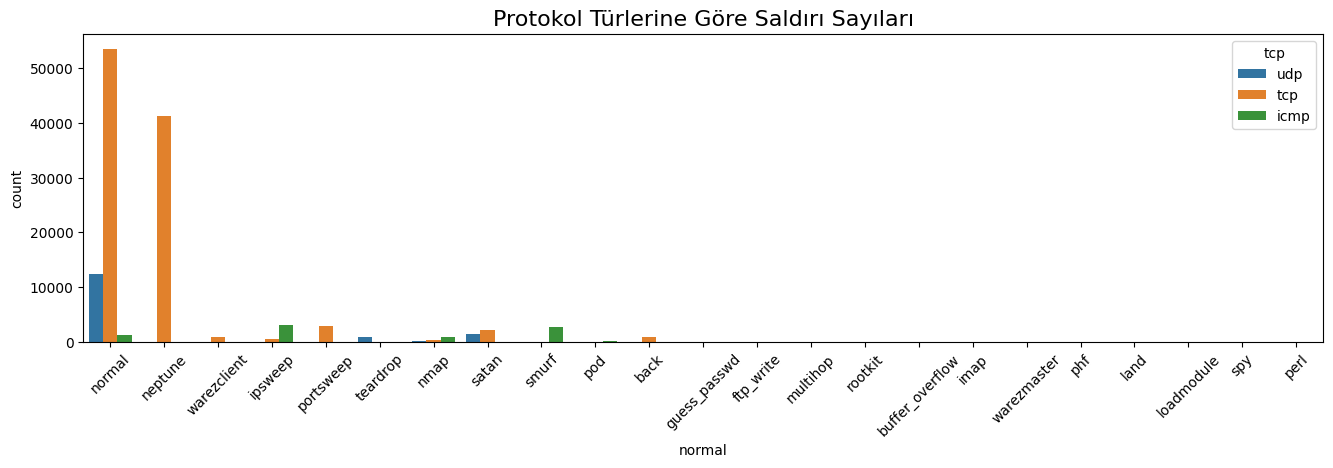

In [19]:
plt.figure(figsize=(16, 4))
sns.countplot(x='normal', data=df, hue='tcp')  # Use 'normal' for attacks and 'tcp' for protocol
plt.xticks(rotation=45)
plt.title('Protokol Türlerine Göre Saldırı Sayıları', fontdict={'fontsize': 16})
plt.show()

In [16]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Protokol Türlerine Göre Saldırı Sayıları',fontdict={'fontsize':16})
plt.show()

ValueError: Could not interpret value `attack` for `x`. An entry with this name does not appear in `data`.

<Figure size 1600x400 with 0 Axes>

In [24]:
df["protocol_type"].value_counts(normalize=True)

protocol_type
tcp    0.815
udp    0.119
icmp   0.066
Name: proportion, dtype: float64

# 5.2 Kullanılan Hizmetin Saldırılar Üzerindeki Etkisi

Bu kod, 'service' sütununa göre farklı saldırı türlerinin dağılımını görselleştirir. Seaborn kütüphanesinin countplot 
fonksiyonu ile her bir hizmet türüne karşılık gelen saldırı sayıları bar grafiğiyle
gösterilir. 'attack' türlerine göre renkli gruplamalar yapılır.

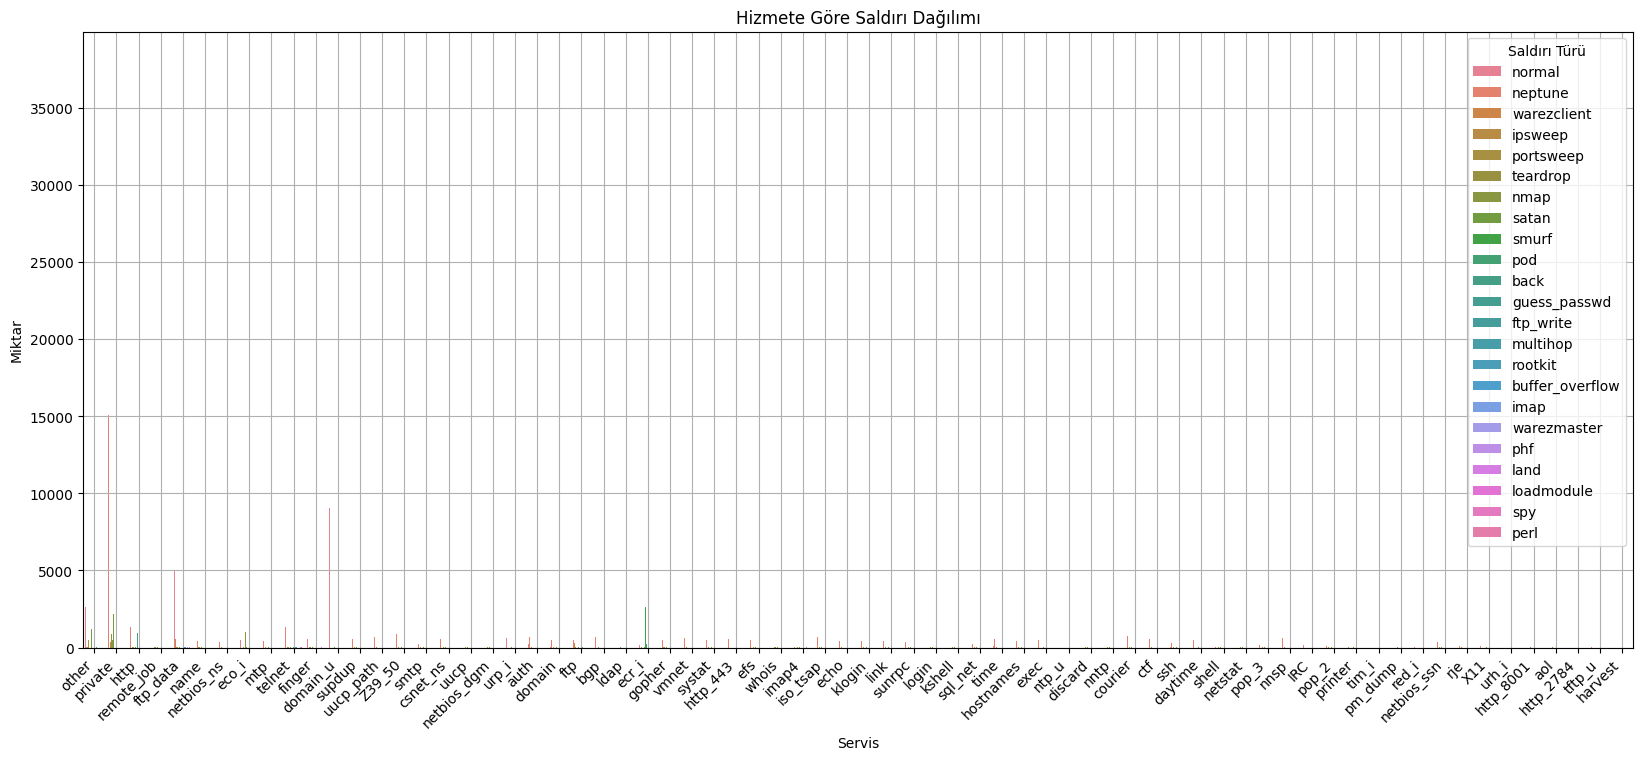

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8)) 
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Servis')
plt.ylabel('Miktar')
plt.title('Hizmete Göre Saldırı Dağılımı')
plt.legend(title='Saldırı Türü')
plt.grid(True)
plt.show()

# 5.3 Kullanılan Genel Hizmet

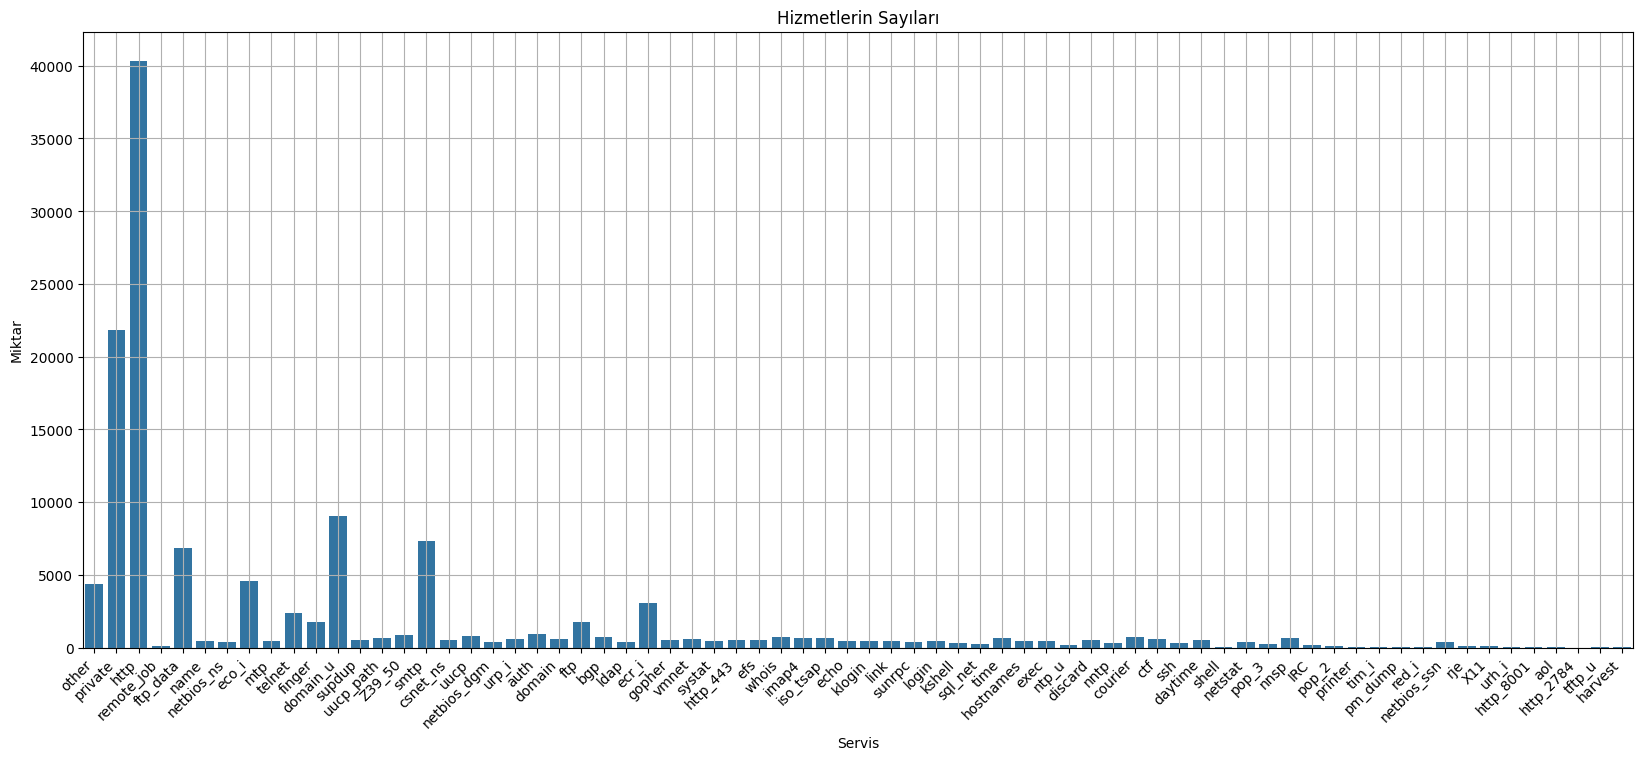

In [35]:
plt.figure(figsize=(20, 8))  
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  
plt.xlabel('Servis')
plt.ylabel('Miktar')
plt.title('Hizmetlerin Sayıları')
plt.grid(True)
plt.show()